In [1]:
# This allows matplotlib plots to be shown inline
%matplotlib inline

from __future__ import division

# import needed libraries
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import root_numpy as rnp

from matplotlib.colors import LogNorm
from scipy.integrate import simps

# Set some matplotlib styles
plt.style.use('bmh')
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['axes.facecolor'] = 'white'
matplotlib.rcParams['legend.numpoints'] = 1

Welcome to ROOTaaS 6.06/08


In [2]:
results = rnp.root2array('/home/omoreno/work/hps/analysis/engrun2015/pass6/bh_selection/trident_analysis_good.root', "results")

electron_chi2 = results['electron_chi2']
electron_p    = results['electron_p']
electron_px   = results['electron_px']
electron_py   = results['electron_py']
electron_pz   = results['electron_pz']
electron_time = results['electron_time']

electron_cluster_time = results['electron_cluster_time']
electron_cluster_x    = results['electron_cluster_x']
electron_cluster_y    = results['electron_cluster_y']
electron_cluster_z    = results['electron_cluster_z']

positron_chi2  = results['positron_chi2']
positron_p     = results['positron_p']
positron_px    = results['positron_px']
positron_py    = results['positron_py']
positron_pz    = results['positron_pz']
positron_time  = results['positron_time']
       
positron_cluster_time = results['positron_cluster_time']
positron_cluster_x    = results['positron_cluster_x']
positron_cluster_y    = results['positron_cluster_y']
positron_cluster_z    = results['positron_cluster_z']

top_chi2 = results['top_chi2']
top_p    = results['top_p']
top_time = results['top_time']
       
top_cluster_time = results['top_cluster_time']
top_cluster_x    = results['top_cluster_x']
top_cluster_y    = results['top_cluster_y']
top_cluster_z    = results['top_cluster_z']

bot_chi2 = results['bot_chi2']
bot_p    = results['bot_p']
bot_time = results['bot_time']

bot_cluster_time = results['bot_cluster_time']
bot_cluster_x    = results['bot_cluster_x']
bot_cluster_y    = results['bot_cluster_y']
bot_cluster_z    = results['bot_cluster_z']

v_chi2 = results['v_chi2']
v0_p   = results["v0_p"]
mass   = results["invariant_mass"]

In [3]:
def calc_sig_eff(sig, bkg, min, max, step, invert) :
        
        cut = min
        sig_eff = []
        bkg_eff = []
        sig_sqrt_sig_bkg = []
        opt_cuts = []
        cuts    = []

        while cut <= max : 
            if invert : 
                sig_integrated = len(sig[sig > cut])
                bkg_integrated = len(bkg[bkg > cut])
            else : 
                sig_integrated = len(sig[sig < cut])
                bkg_integrated = len(bkg[bkg < cut])
            sig_eff.append((sig_integrated/len(sig))*100)
            bkg_eff.append((bkg_integrated/len(bkg))*100)
            if sig_integrated+bkg_integrated > 0:
                sig_sqrt_sig_bkg.append(sig_integrated/math.sqrt(sig_integrated + bkg_integrated))
            else:
                sig_sqrt_sig_bkg.append(0)
            cuts.append(cut)
            cut += step
        
        max_index = np.argmax(sig_sqrt_sig_bkg)
        print "Signal optimized at: " + str(cuts[max_index])
        print "Signal efficiency at optimal: %s" % sig_eff[max_index]
        print "Background efficiency at optimal: %s" % bkg_eff[max_index]
  
        return cuts, sig_eff, bkg_eff, sig_sqrt_sig_bkg

In [4]:
# Use the ECal cluster coincidence time to define the signal (tridents) and 
# background (accidentals) regions.  These regions will be used to optimize
# cuts meant specifically to reject accidentals.
cluster_time_diff = top_cluster_time - bot_cluster_time 

radiative_cut = v0_p > 0.8*1.056
bkg_cut = (np.abs(cluster_time_diff) > 3) & radiative_cut
sig_cut = (np.abs(cluster_time_diff) < 1) & radiative_cut

top_track_cluster_dt = top_cluster_time - top_time
bot_track_cluster_dt = bot_cluster_time - bot_time


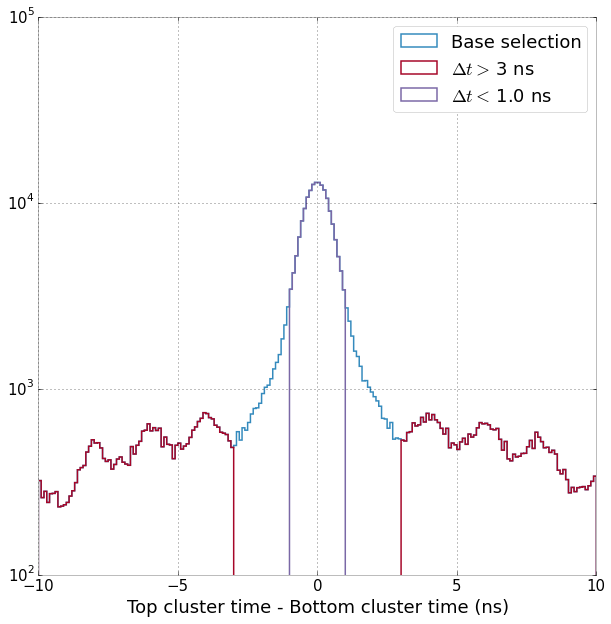

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10.0, 10.0))   

bins = np.linspace(-10, 10, 201)
ax.hist(cluster_time_diff[radiative_cut], bins, histtype="step", lw=1.5, label="Base selection")
ax.hist(cluster_time_diff[bkg_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 3 ns")
ax.hist(cluster_time_diff[sig_cut], bins, histtype="step", lw=1.5, label="$\Delta t <$ 1.0 ns")
ax.set_xlabel("Top cluster time - Bottom cluster time (ns)")
ax.set_yscale("symlog")
ax.legend()

# Cuts: None
### Electron p

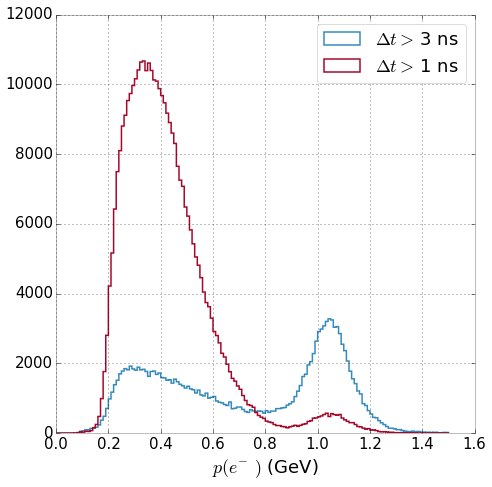

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))   
            
bins = np.linspace(0, 1.5, 151)
ax.hist(electron_p[(np.abs(cluster_time_diff) > 3)], bins, histtype="step", lw=1.5, label="$\Delta t >$ 3 ns")
ax.hist(electron_p[(np.abs(cluster_time_diff) < 1)], bins, histtype="step", lw=1.5, label="$\Delta t >$ 1 ns")
ax.set_xlabel("$p(e^-)$ (GeV)")
ax.legend()

Signal optimized at: 0.795
Signal efficiency at optimal: 96.2569894567
Background efficiency at optimal: 51.6801246826
Area under ROC curve: 7502.57839933


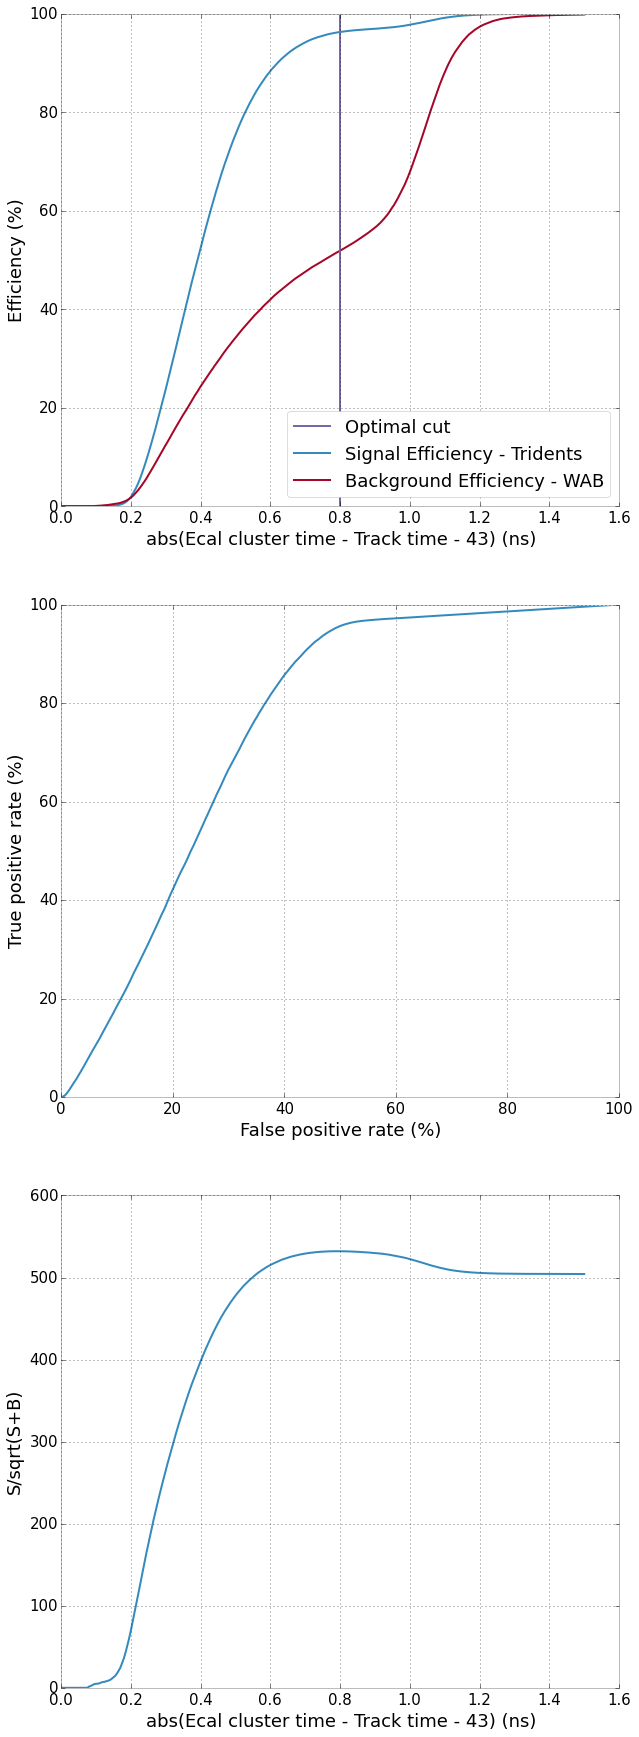

In [7]:
cuts, sig_eff, bkg_eff, sig_sqrt_sig_bkg  = calc_sig_eff(
    electron_p[np.abs(cluster_time_diff) < 1], 
    electron_p[np.abs(cluster_time_diff) > 3], 0, 1.5, .005, False)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

ax0.errorbar(cuts, sig_eff, marker='None', linestyle='-', label='Signal Efficiency - Tridents')
ax0.errorbar(cuts, bkg_eff, marker='None', linestyle='-', label='Background Efficiency - WAB')
ax0.plot([0.8, 0.8], [0, 100], linestyle='-', label='Optimal cut')
ax0.set_ylabel("Efficiency (%)")
ax0.set_xlabel("abs(Ecal cluster time - Track time - 43) (ns)")
ax0.legend(loc=4)

ax1.errorbar(bkg_eff, sig_eff, marker='None', linestyle='-')
ax1.set_xlabel("False positive rate (%)")
ax1.set_ylabel("True positive rate (%)")

ax2.errorbar(cuts, sig_sqrt_sig_bkg, marker='None', linestyle='-')
ax2.set_ylabel("S/sqrt(S+B)")
ax2.set_xlabel("abs(Ecal cluster time - Track time - 43) (ns)")

print "Area under ROC curve: %s" % np.trapz(sig_eff, bkg_eff)

# Cuts: Radiative
### Cluster time

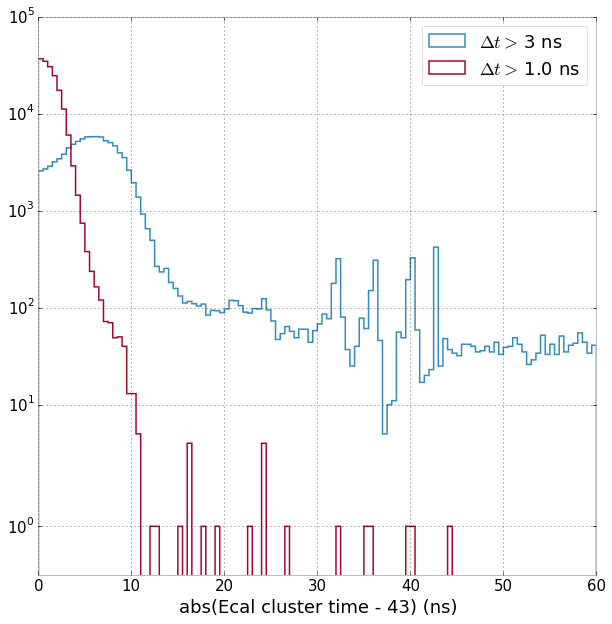

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10.0, 10.0))   

cluster_time = np.append(top_cluster_time, bot_cluster_time)
cluster_time = cluster_time - 43
cluster_time = np.absolute(cluster_time)

bins = np.linspace(0, 60, 121)
ax.hist(cluster_time[bkg_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 3 ns")
ax.hist(cluster_time[sig_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 1.0 ns")
ax.set_xlabel("abs(Ecal cluster time - 43) (ns)")
ax.set_yscale("symlog")
ax.legend();

Signal optimized at: 3.55
Signal efficiency at optimal: 96.4869757858
Background efficiency at optimal: 22.2660499257
Area under ROC curve: 8691.15381931


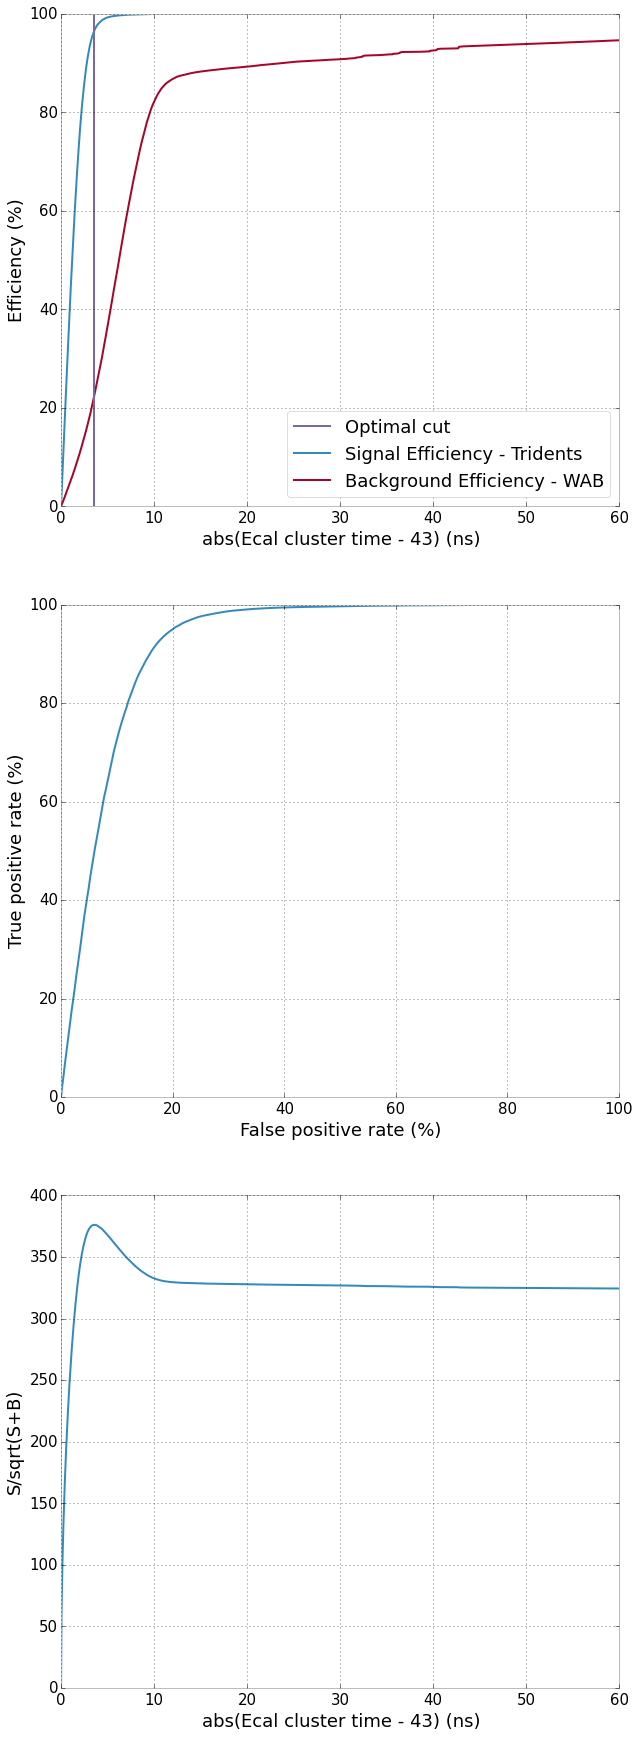

In [9]:
cuts, sig_eff, bkg_eff, sig_sqrt_sig_bkg  = calc_sig_eff(
    cluster_time[sig_cut], 
    cluster_time[bkg_cut], 0, 60, .05, False)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

ax0.errorbar(cuts, sig_eff, marker='None', linestyle='-', label='Signal Efficiency - Tridents')
ax0.errorbar(cuts, bkg_eff, marker='None', linestyle='-', label='Background Efficiency - WAB')
ax0.plot([3.55, 3.55], [0, 100], linestyle='-', label='Optimal cut')
ax0.set_ylabel("Efficiency (%)")
ax0.set_xlabel("abs(Ecal cluster time - 43) (ns)")
ax0.legend(loc=4)

ax1.errorbar(bkg_eff, sig_eff, marker='None', linestyle='-')
ax1.set_xlabel("False positive rate (%)")
ax1.set_ylabel("True positive rate (%)")

ax2.errorbar(cuts, sig_sqrt_sig_bkg, marker='None', linestyle='-')
ax2.set_ylabel("S/sqrt(S+B)")
ax2.set_xlabel("abs(Ecal cluster time - 43) (ns)")

print "Area under ROC curve: %s" % np.trapz(sig_eff, bkg_eff)

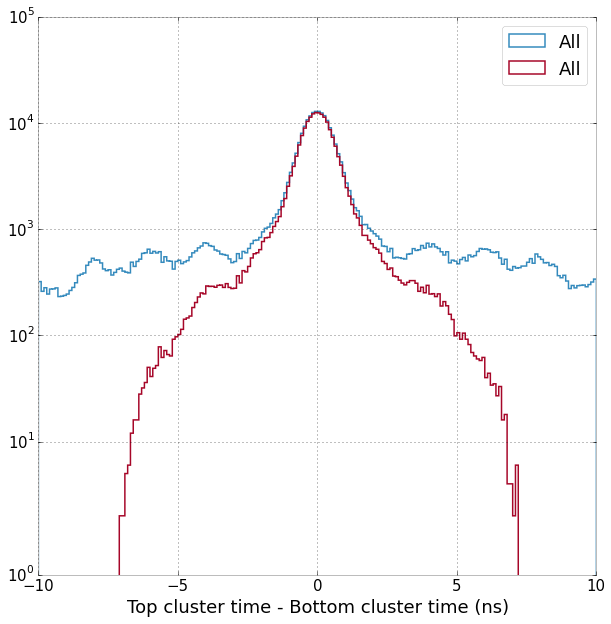

In [10]:
cluster_time_cut = (np.absolute(top_cluster_time - 43) < 3.6) & (np.absolute(bot_cluster_time - 43) < 3.6)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10.0, 10.0))   

bins = np.linspace(-10, 10, 201)
ax.hist(cluster_time_diff[radiative_cut], bins, histtype="step", lw=1.5, label="All")
ax.hist(cluster_time_diff[radiative_cut & cluster_time_cut], bins, histtype="step", lw=1.5, label="All")
ax.set_xlabel("Top cluster time - Bottom cluster time (ns)")
ax.set_yscale("symlog")
ax.legend();

### Track-Cluster dt

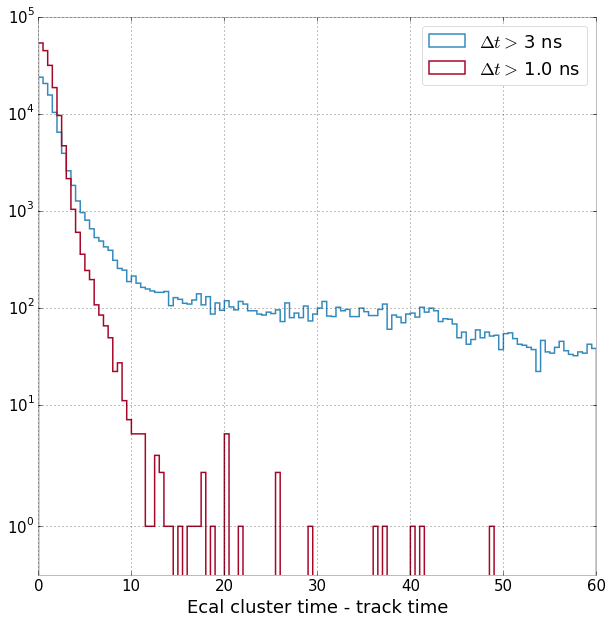

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10.0, 10.0))   

track_cluster_dt = np.append(top_track_cluster_dt, bot_track_cluster_dt)
track_cluster_dt = track_cluster_dt - 43.0
track_cluster_dt = np.absolute(track_cluster_dt)

bins = np.linspace(0, 60, 121)
ax.hist(track_cluster_dt[bkg_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 3 ns")
ax.hist(track_cluster_dt[sig_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 1.0 ns")
ax.set_xlabel("Ecal cluster time - track time")
ax.set_yscale("symlog")
ax.legend()

Signal optimized at: 3.8
Signal efficiency at optimal: 98.7428387665
Background efficiency at optimal: 79.8603819632
Area under ROC curve: 5791.78340281


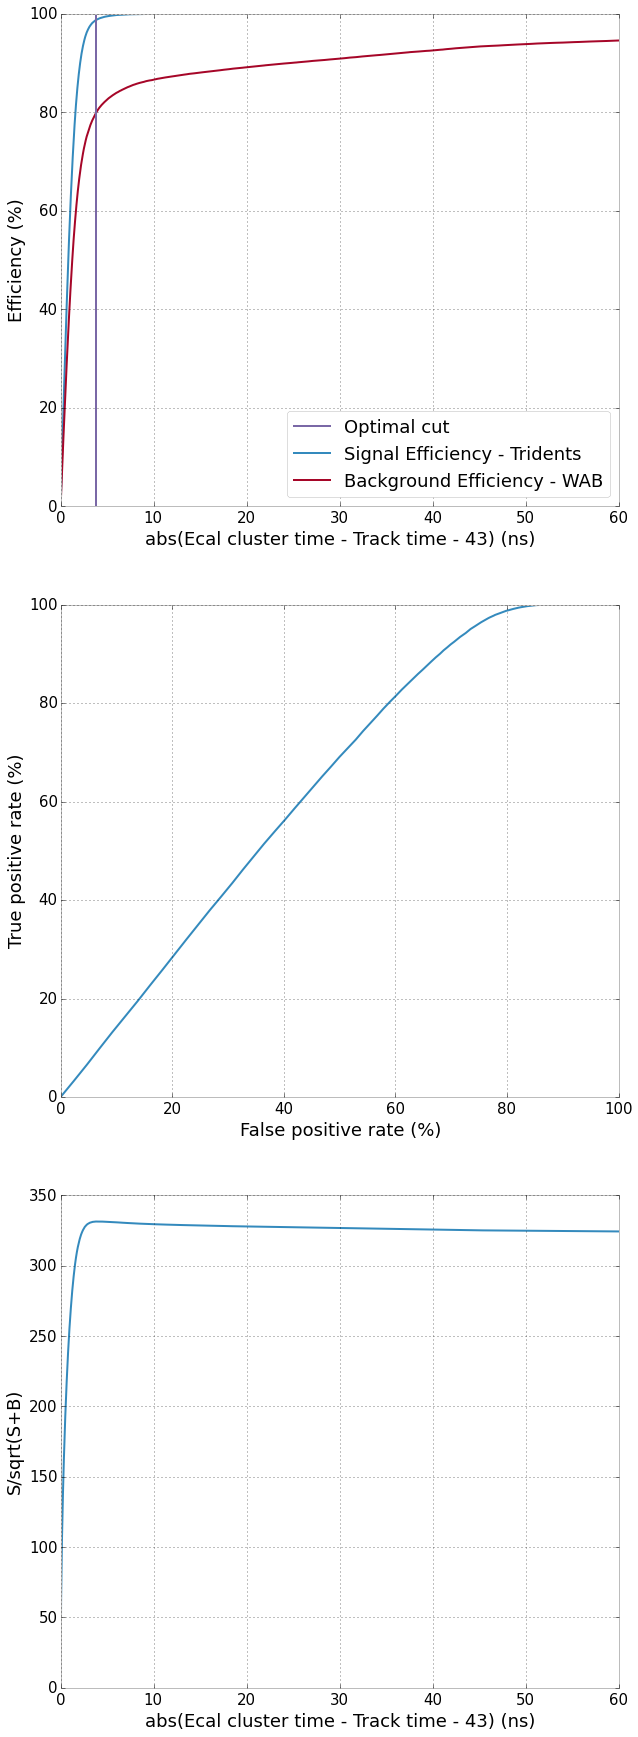

In [12]:
cuts, sig_eff, bkg_eff, sig_sqrt_sig_bkg  = calc_sig_eff(
    track_cluster_dt[sig_cut], 
    track_cluster_dt[bkg_cut], 0, 60, .05, False)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

ax0.errorbar(cuts, sig_eff, marker='None', linestyle='-', label='Signal Efficiency - Tridents')
ax0.errorbar(cuts, bkg_eff, marker='None', linestyle='-', label='Background Efficiency - WAB')
ax0.plot([3.8, 3.8], [0, 100], linestyle='-', label='Optimal cut')
ax0.set_ylabel("Efficiency (%)")
ax0.set_xlabel("abs(Ecal cluster time - Track time - 43) (ns)")
ax0.legend(loc=4)

ax1.errorbar(bkg_eff, sig_eff, marker='None', linestyle='-')
ax1.set_xlabel("False positive rate (%)")
ax1.set_ylabel("True positive rate (%)")

ax2.errorbar(cuts, sig_sqrt_sig_bkg, marker='None', linestyle='-')
ax2.set_ylabel("S/sqrt(S+B)")
ax2.set_xlabel("abs(Ecal cluster time - Track time - 43) (ns)")

print "Area under ROC curve: %s" % np.trapz(sig_eff, bkg_eff)

### Electron p

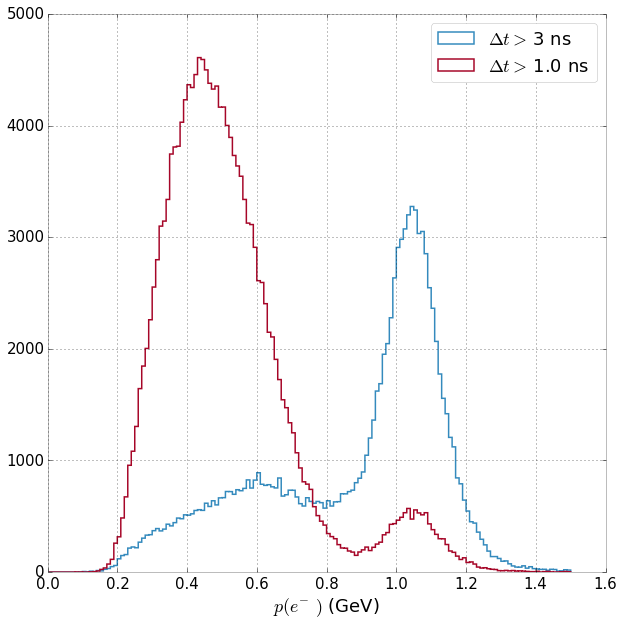

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))   
            
bins = np.linspace(0, 1.5, 151)
ax.hist(electron_p[bkg_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 3 ns")
ax.hist(electron_p[sig_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 1.0 ns")
ax.set_xlabel("$p(e^-)$ (GeV)")
ax.legend()

Signal optimized at: 0.795
Signal efficiency at optimal: 91.9919246299
Background efficiency at optimal: 31.973097988
Area under ROC curve: 8428.53151368


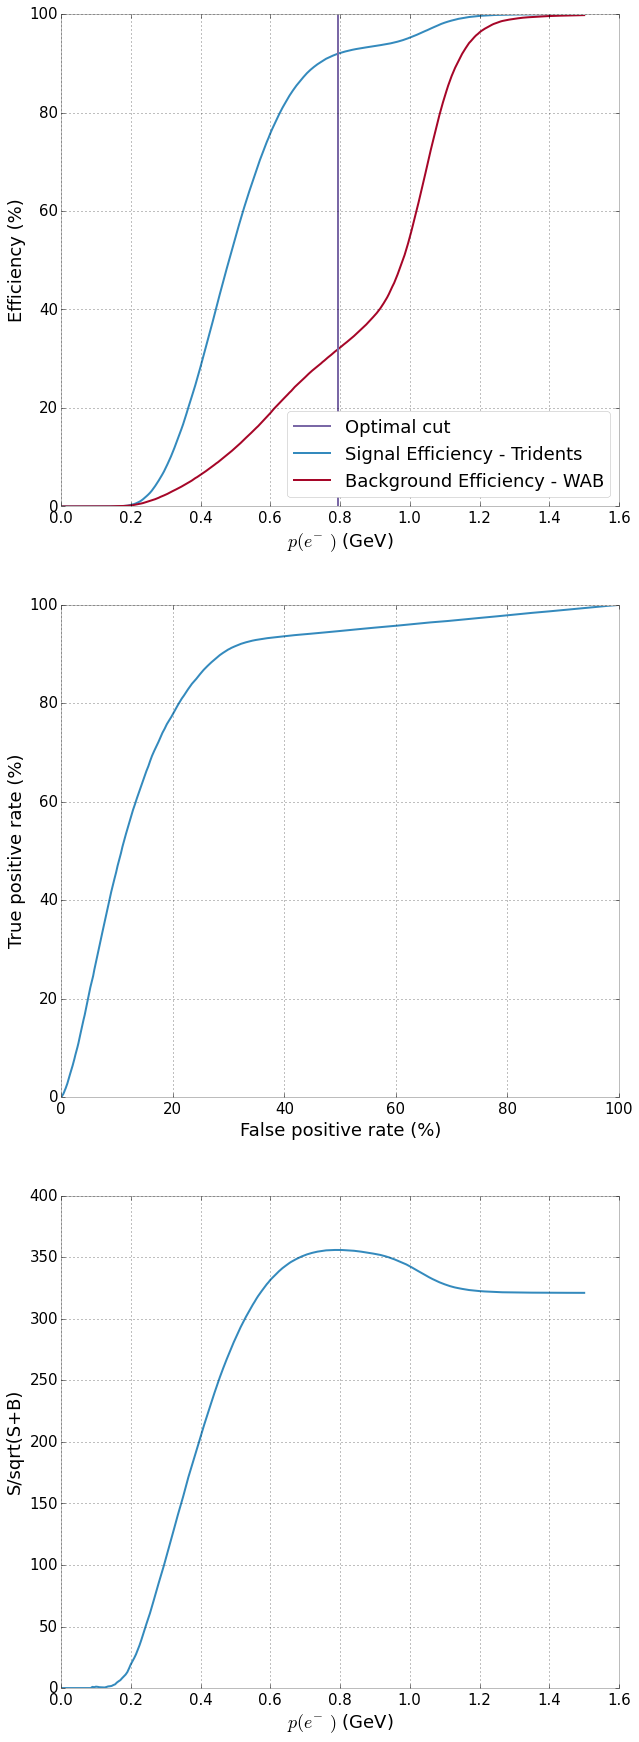

In [14]:
cuts, sig_eff, bkg_eff, sig_sqrt_sig_bkg  = calc_sig_eff(
    electron_p[sig_cut], 
    electron_p[bkg_cut], 0, 1.5, .005, False)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

ax0.errorbar(cuts, sig_eff, marker='None', linestyle='-', label='Signal Efficiency - Tridents')
ax0.errorbar(cuts, bkg_eff, marker='None', linestyle='-', label='Background Efficiency - WAB')
ax0.plot([0.795, 0.795], [0, 100], linestyle='-', label='Optimal cut')
ax0.set_ylabel("Efficiency (%)")
ax0.set_xlabel("$p(e^-)$ (GeV)")
ax0.legend(loc=4)

ax1.errorbar(bkg_eff, sig_eff, marker='None', linestyle='-')
ax1.set_xlabel("False positive rate (%)")
ax1.set_ylabel("True positive rate (%)")

ax2.errorbar(cuts, sig_sqrt_sig_bkg, marker='None', linestyle='-')
ax2.set_ylabel("S/sqrt(S+B)")
ax2.set_xlabel("$p(e^-)$ (GeV)")

print "Area under ROC curve: %s" % np.trapz(sig_eff, bkg_eff)

### Track Chi2

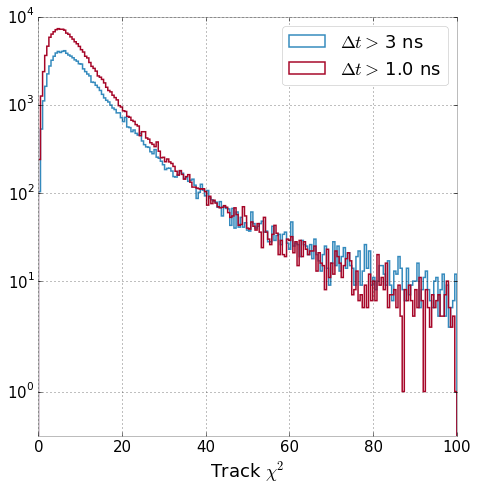

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))   

chi2 = np.append(electron_chi2, positron_chi2)

bins = np.linspace(0, 100, 200)
ax.hist(chi2[bkg_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 3 ns")
ax.hist(chi2[sig_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 1.0 ns")
ax.set_yscale("symlog")
ax.set_xlabel("Track $\chi^2$")
ax.legend()

Signal optimized at: 99.25
Signal efficiency at optimal: 99.6242213461
Background efficiency at optimal: 98.5603072354
Area under ROC curve: 5397.35243884


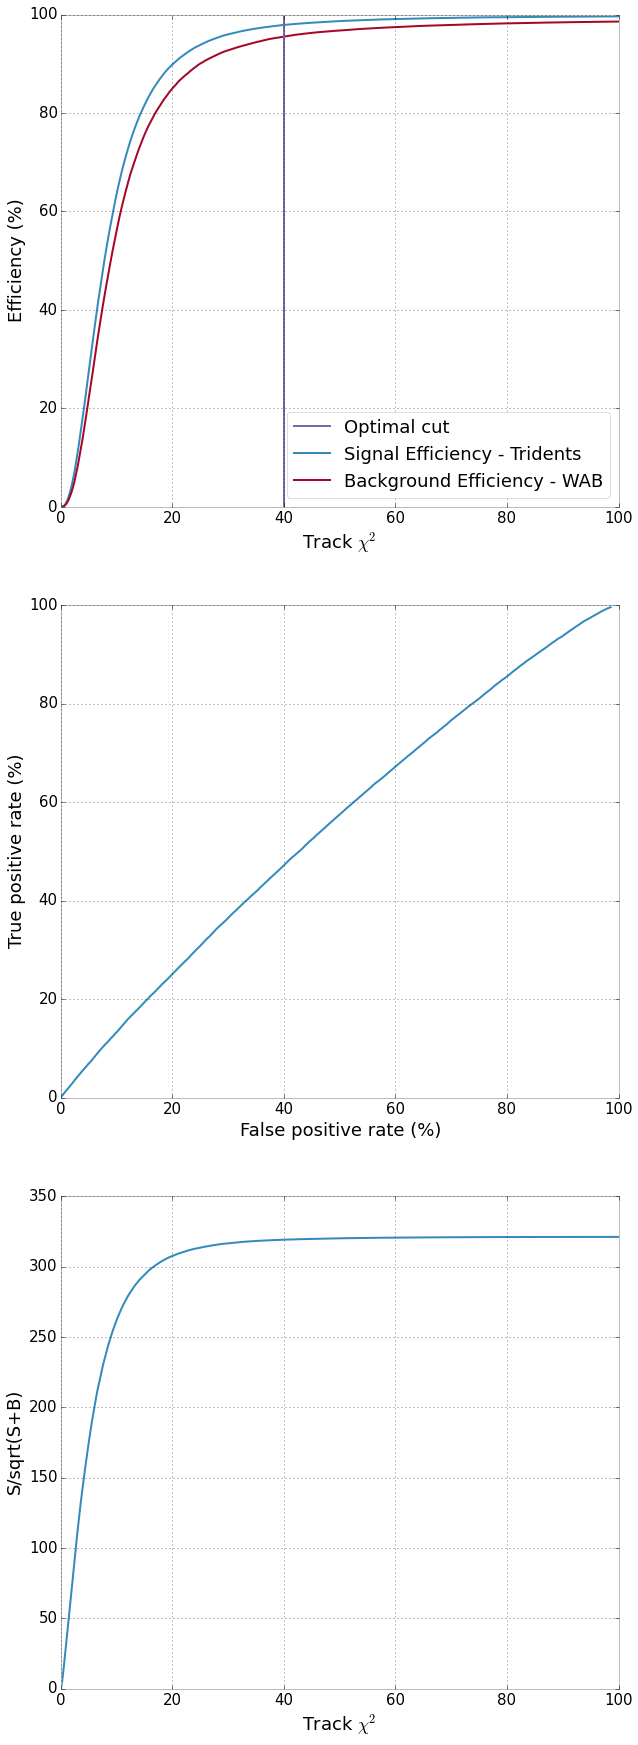

In [16]:
cuts, sig_eff, bkg_eff, sig_sqrt_sig_bkg  = calc_sig_eff(
    chi2[sig_cut], 
    chi2[bkg_cut], 0, 100, .05, False)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

ax0.errorbar(cuts, sig_eff, marker='None', linestyle='-', label='Signal Efficiency - Tridents')
ax0.errorbar(cuts, bkg_eff, marker='None', linestyle='-', label='Background Efficiency - WAB')
ax0.plot([40, 40], [0, 100], linestyle='-', label='Optimal cut')
ax0.set_ylabel("Efficiency (%)")
ax0.set_xlabel("Track $\chi^2$")
ax0.legend(loc=4)

ax1.errorbar(bkg_eff, sig_eff, marker='None', linestyle='-')
ax1.set_xlabel("False positive rate (%)")
ax1.set_ylabel("True positive rate (%)")

ax2.errorbar(cuts, sig_sqrt_sig_bkg, marker='None', linestyle='-')
ax2.set_ylabel("S/sqrt(S+B)")
ax2.set_xlabel("Track $\chi^2$")

print "Area under ROC curve: %s" % np.trapz(sig_eff, bkg_eff)

### V0(p)

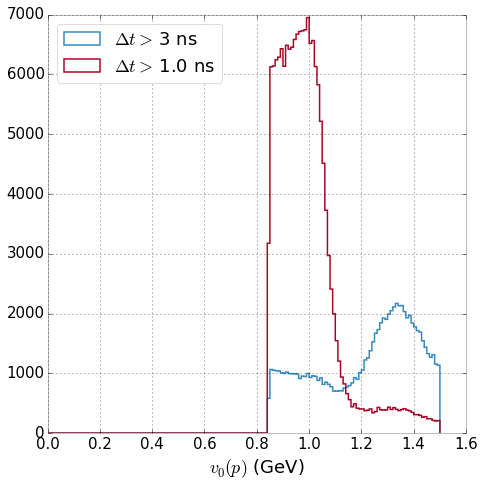

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))   
            
bins = np.linspace(0, 1.5, 151)
ax.hist(v0_p[bkg_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 3 ns")
ax.hist(v0_p[sig_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 1.0 ns")
ax.set_xlabel("$v_{0}(p)$ (GeV)")
ax.legend(loc=2)

Signal optimized at: 1.155
Signal efficiency at optimal: 90.3071737396
Background efficiency at optimal: 26.7080980353
Area under ROC curve: 6230.18730687


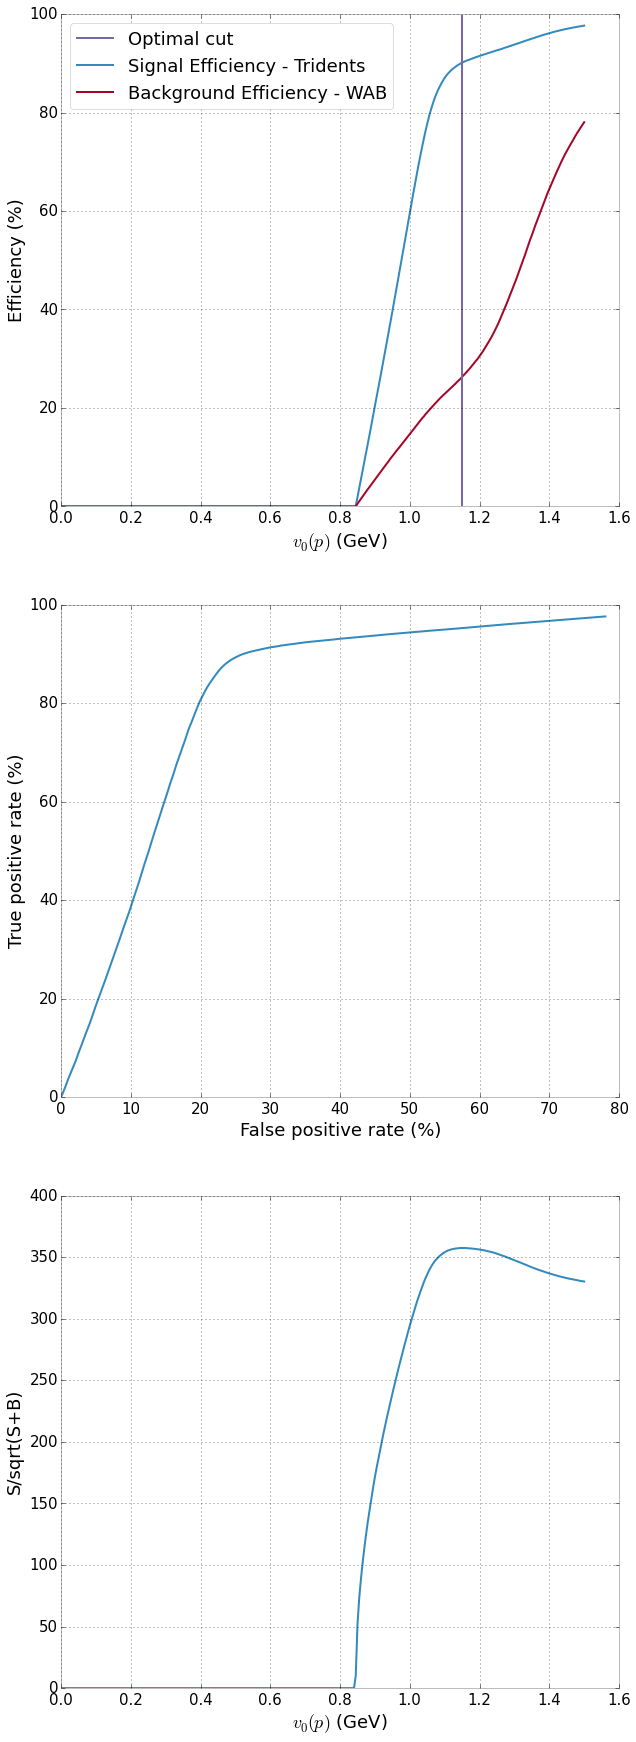

In [18]:
cuts, sig_eff, bkg_eff, sig_sqrt_sig_bkg  = calc_sig_eff(
    v0_p[sig_cut], 
    v0_p[bkg_cut], 0, 1.5, .005, False)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

ax0.errorbar(cuts, sig_eff, marker='None', linestyle='-', label='Signal Efficiency - Tridents')
ax0.errorbar(cuts, bkg_eff, marker='None', linestyle='-', label='Background Efficiency - WAB')
ax0.plot([1.15, 1.15], [0, 100], linestyle='-', label='Optimal cut')
ax0.set_ylabel("Efficiency (%)")
ax0.set_xlabel("$v_{0}(p)$ (GeV)")
ax0.legend(loc=2)

ax1.errorbar(bkg_eff, sig_eff, marker='None', linestyle='-')
ax1.set_xlabel("False positive rate (%)")
ax1.set_ylabel("True positive rate (%)")

ax2.errorbar(cuts, sig_sqrt_sig_bkg, marker='None', linestyle='-')
ax2.set_ylabel("S/sqrt(S+B)")
ax2.set_xlabel("$v_{0}(p)$ (GeV)")

print "Area under ROC curve: %s" % np.trapz(sig_eff, bkg_eff)

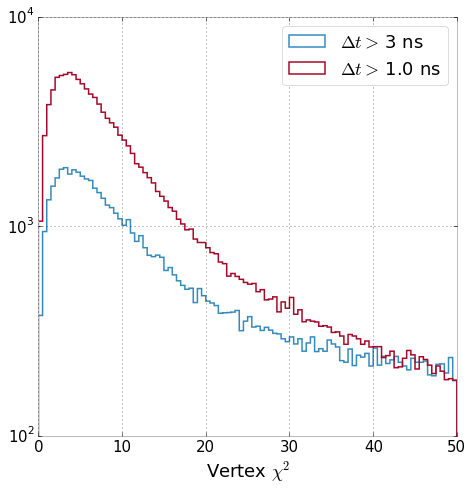

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))   
            
bins = np.linspace(0, 50, 101)
ax.hist(v_chi2[bkg_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 3 ns")
ax.hist(v_chi2[sig_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 1.0 ns")
ax.set_yscale("symlog")
ax.set_xlabel("Vertex $\chi^2$")
ax.legend();

Signal optimized at: 499.5
Signal efficiency at optimal: 99.1579223192
Background efficiency at optimal: 98.5158489174
Area under ROC curve: 6306.9629458


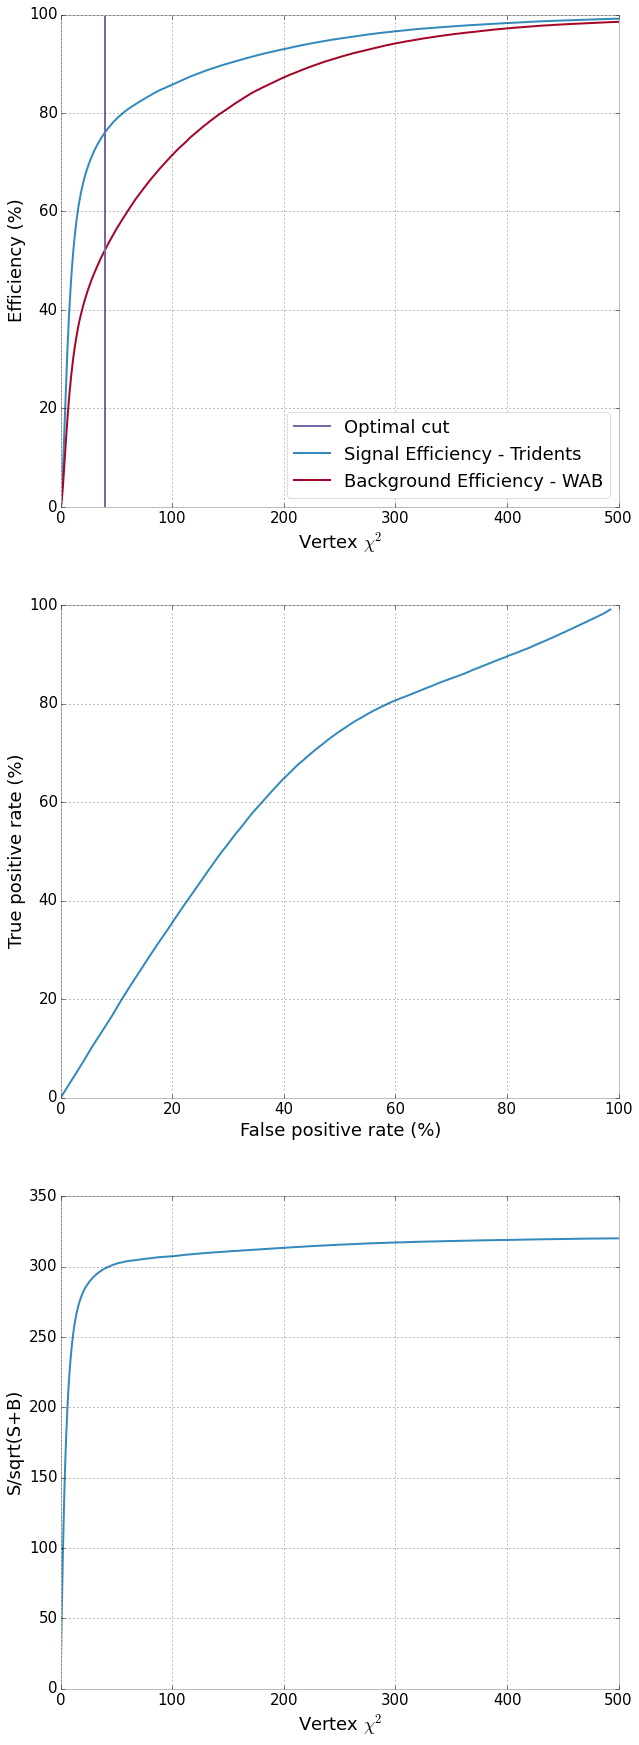

In [20]:
cuts, sig_eff, bkg_eff, sig_sqrt_sig_bkg  = calc_sig_eff(
    v_chi2[sig_cut], 
    v_chi2[bkg_cut], 0, 500, .5, False)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

ax0.errorbar(cuts, sig_eff, marker='None', linestyle='-', label='Signal Efficiency - Tridents')
ax0.errorbar(cuts, bkg_eff, marker='None', linestyle='-', label='Background Efficiency - WAB')
ax0.plot([40, 40], [0, 100], linestyle='-', label='Optimal cut')
ax0.set_ylabel("Efficiency (%)")
ax0.set_xlabel("Vertex $\chi^2$")
ax0.legend(loc=4)

ax1.errorbar(bkg_eff, sig_eff, marker='None', linestyle='-')
ax1.set_xlabel("False positive rate (%)")
ax1.set_ylabel("True positive rate (%)")

ax2.errorbar(cuts, sig_sqrt_sig_bkg, marker='None', linestyle='-')
ax2.set_ylabel("S/sqrt(S+B)")
ax2.set_xlabel("Vertex $\chi^2$")

print "Area under ROC curve: %s" % np.trapz(sig_eff, bkg_eff)

# Cuts: Radiative + FEE

In [21]:
radiative_cut = v0_p > 0.8*1.056
fee_cut = electron_p < 0.75*1.056
bkg_cut = (np.abs(cluster_time_diff) > 3) & radiative_cut & fee_cut
sig_cut = (np.abs(cluster_time_diff) < 1) & radiative_cut & fee_cut

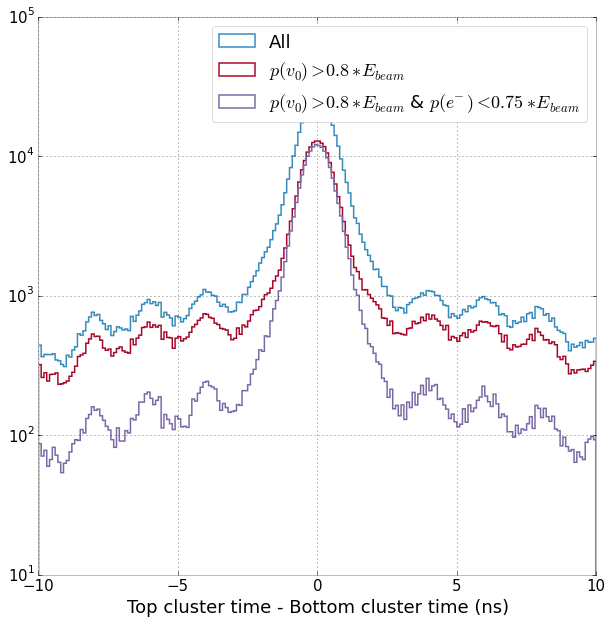

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10.0, 10.0))   

bins = np.linspace(-10, 10, 201)
ax.hist(cluster_time_diff, bins, histtype="step", lw=1.5, label="All")
ax.hist(cluster_time_diff[radiative_cut], bins, histtype="step", lw=1.5, label="$p(v_{0}) > 0.8*E_{beam}$")
ax.hist(cluster_time_diff[radiative_cut & fee_cut], bins, histtype="step", lw=1.5, 
        label="$p(v_{0}) > 0.8*E_{beam}$ & $p(e^{-}) < 0.75*E_{beam}$")
ax.set_xlabel("Top cluster time - Bottom cluster time (ns)")
ax.set_yscale("symlog")
ax.legend();

### Cluster-track dt

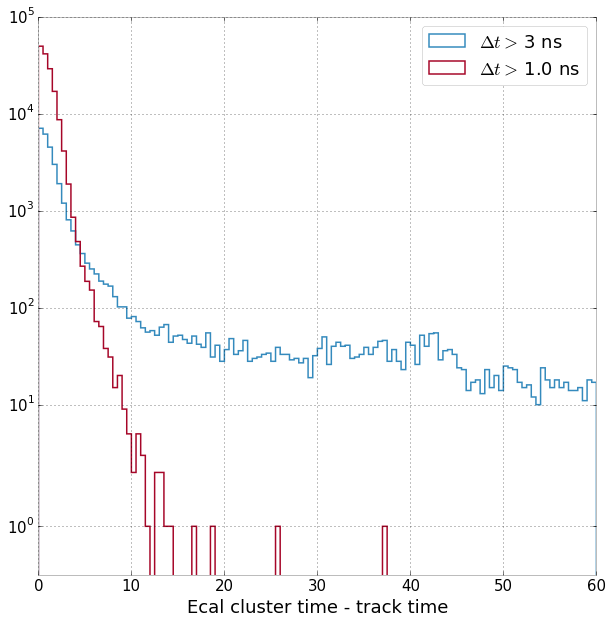

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10.0, 10.0))   

track_cluster_dt = np.append(top_track_cluster_dt, bot_track_cluster_dt)
track_cluster_dt = track_cluster_dt - 43.0
track_cluster_dt = np.absolute(track_cluster_dt)

bins = np.linspace(0, 60, 121)
ax.hist(track_cluster_dt[bkg_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 3 ns")
ax.hist(track_cluster_dt[sig_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 1.0 ns")
ax.set_xlabel("Ecal cluster time - track time")
ax.set_yscale("symlog")
ax.legend();

Signal optimized at: 4.7
Signal efficiency at optimal: 99.5114302006
Background efficiency at optimal: 77.0399666944
Area under ROC curve: 5875.71918681


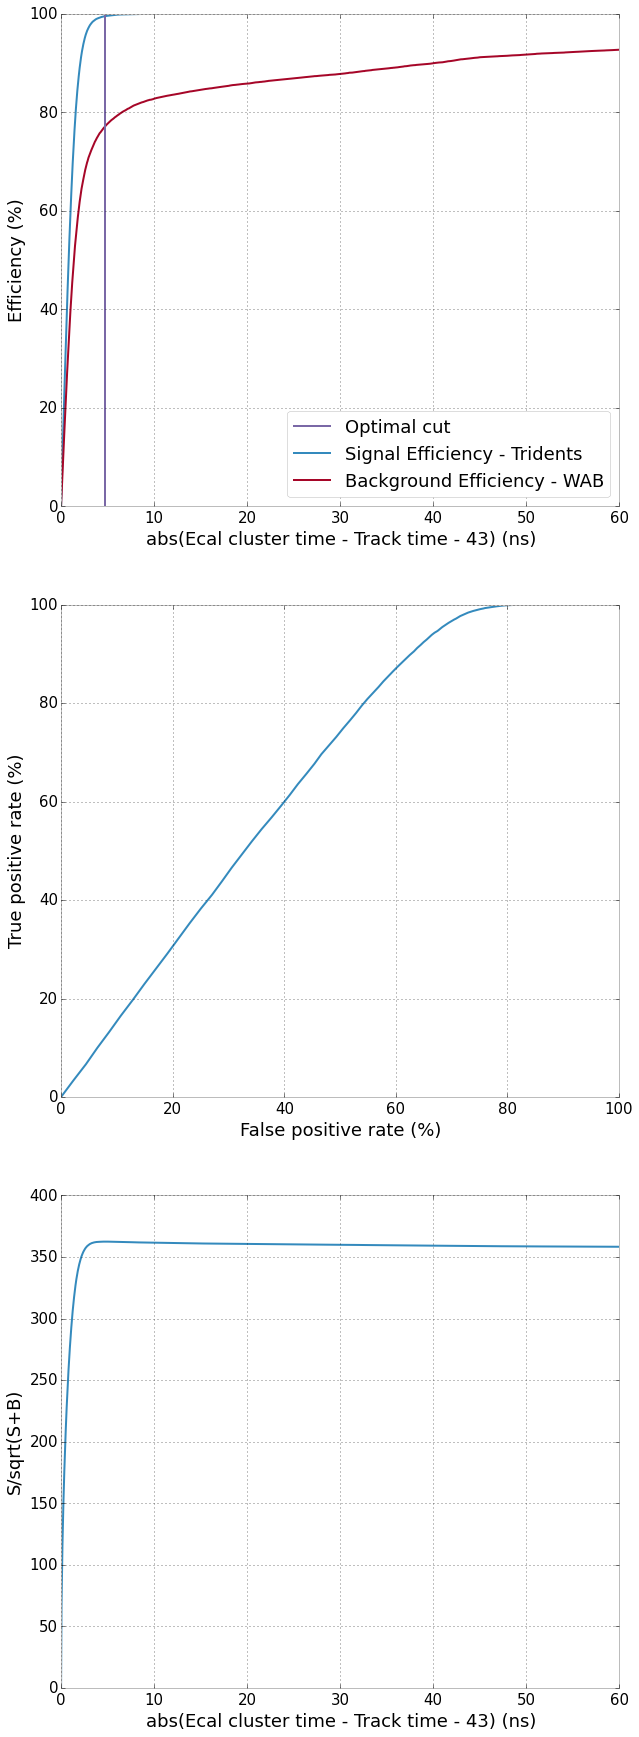

In [24]:
cuts, sig_eff, bkg_eff, sig_sqrt_sig_bkg  = calc_sig_eff(
    track_cluster_dt[sig_cut], 
    track_cluster_dt[bkg_cut], 0, 60, .05, False)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

ax0.errorbar(cuts, sig_eff, marker='None', linestyle='-', label='Signal Efficiency - Tridents')
ax0.errorbar(cuts, bkg_eff, marker='None', linestyle='-', label='Background Efficiency - WAB')
ax0.plot([4.7, 4.7], [0, 100], linestyle='-', label='Optimal cut')
ax0.set_ylabel("Efficiency (%)")
ax0.set_xlabel("abs(Ecal cluster time - Track time - 43) (ns)")
ax0.legend(loc=4)

ax1.errorbar(bkg_eff, sig_eff, marker='None', linestyle='-')
ax1.set_xlabel("False positive rate (%)")
ax1.set_ylabel("True positive rate (%)")

ax2.errorbar(cuts, sig_sqrt_sig_bkg, marker='None', linestyle='-')
ax2.set_ylabel("S/sqrt(S+B)")
ax2.set_xlabel("abs(Ecal cluster time - Track time - 43) (ns)")

print "Area under ROC curve: %s" % np.trapz(sig_eff, bkg_eff)

### Track chi2

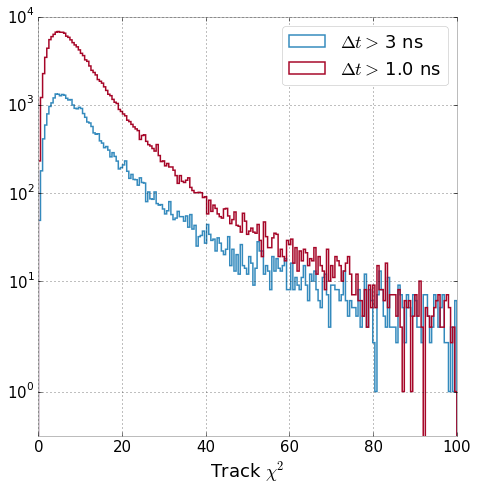

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))   

chi2 = np.append(electron_chi2, positron_chi2)

bins = np.linspace(0, 100, 200)
ax.hist(chi2[bkg_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 3 ns")
ax.hist(chi2[sig_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 1.0 ns")
ax.set_yscale("symlog")
ax.set_xlabel("Track $\chi^2$")
ax.legend()

Signal optimized at: 99.45
Signal efficiency at optimal: 99.6695350163
Background efficiency at optimal: 97.100630427
Area under ROC curve: 5255.23677556


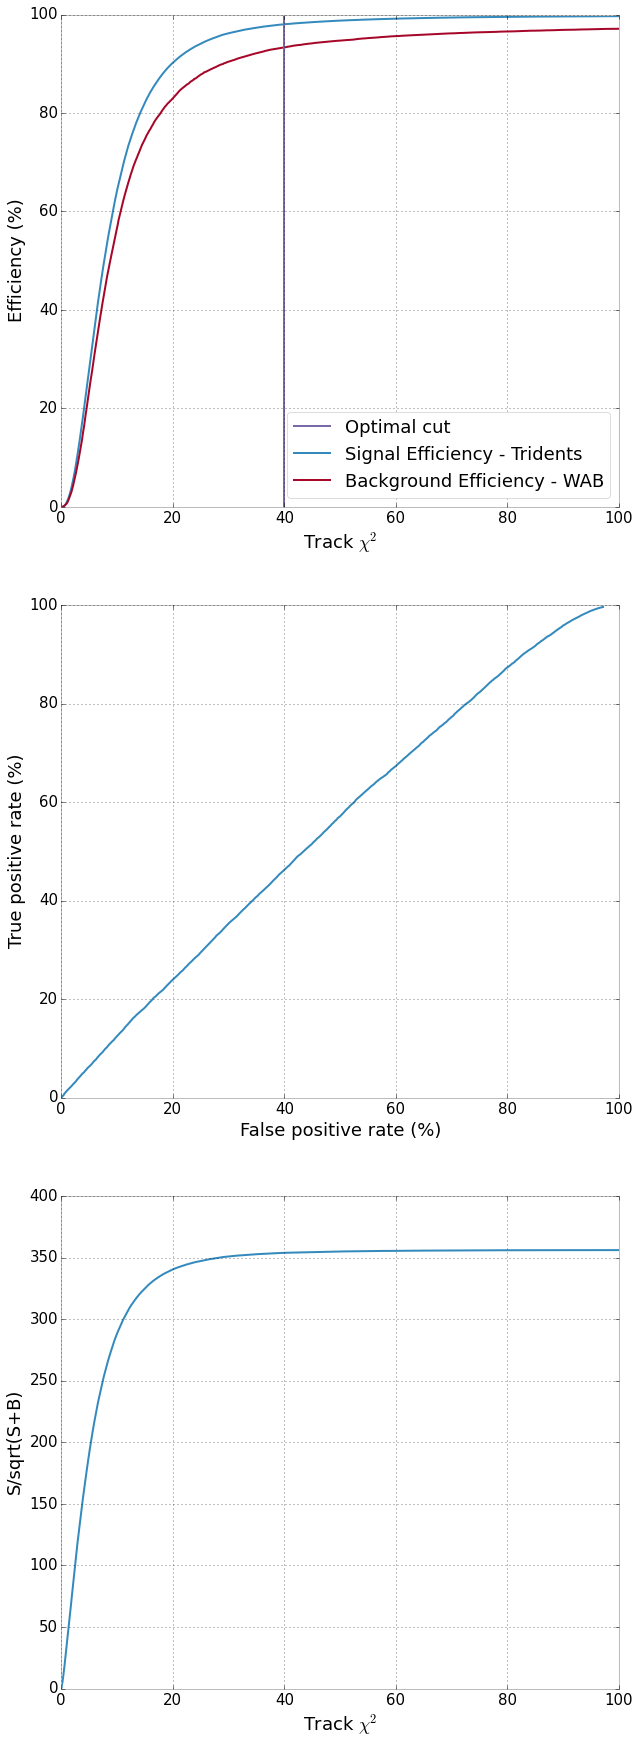

In [26]:
cuts, sig_eff, bkg_eff, sig_sqrt_sig_bkg  = calc_sig_eff(
    chi2[sig_cut], 
    chi2[bkg_cut], 0, 100, .05, False)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

ax0.errorbar(cuts, sig_eff, marker='None', linestyle='-', label='Signal Efficiency - Tridents')
ax0.errorbar(cuts, bkg_eff, marker='None', linestyle='-', label='Background Efficiency - WAB')
ax0.plot([40, 40], [0, 100], linestyle='-', label='Optimal cut')
ax0.set_ylabel("Efficiency (%)")
ax0.set_xlabel("Track $\chi^2$")
ax0.legend(loc=4)

ax1.errorbar(bkg_eff, sig_eff, marker='None', linestyle='-')
ax1.set_xlabel("False positive rate (%)")
ax1.set_ylabel("True positive rate (%)")

ax2.errorbar(cuts, sig_sqrt_sig_bkg, marker='None', linestyle='-')
ax2.set_ylabel("S/sqrt(S+B)")
ax2.set_xlabel("Track $\chi^2$")

print "Area under ROC curve: %s" % np.trapz(sig_eff, bkg_eff)

### p(v0)

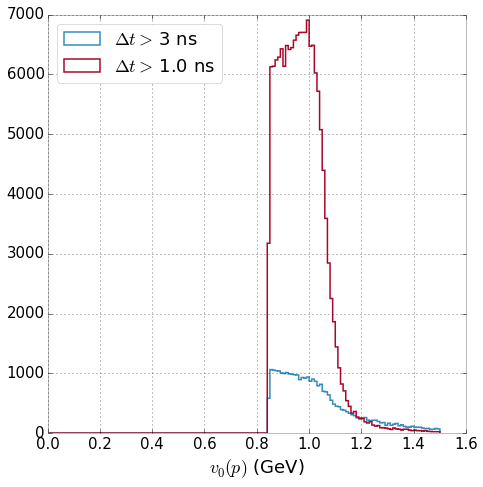

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))   
            
bins = np.linspace(0, 1.5, 151)
ax.hist(v0_p[bkg_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 3 ns")
ax.hist(v0_p[sig_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 1.0 ns")
ax.set_xlabel("$v_{0}(p)$ (GeV)")
ax.legend(loc=2)

Signal optimized at: 1.245
Signal efficiency at optimal: 98.461069929
Background efficiency at optimal: 80.8879505174
Area under ROC curve: 5379.38897176


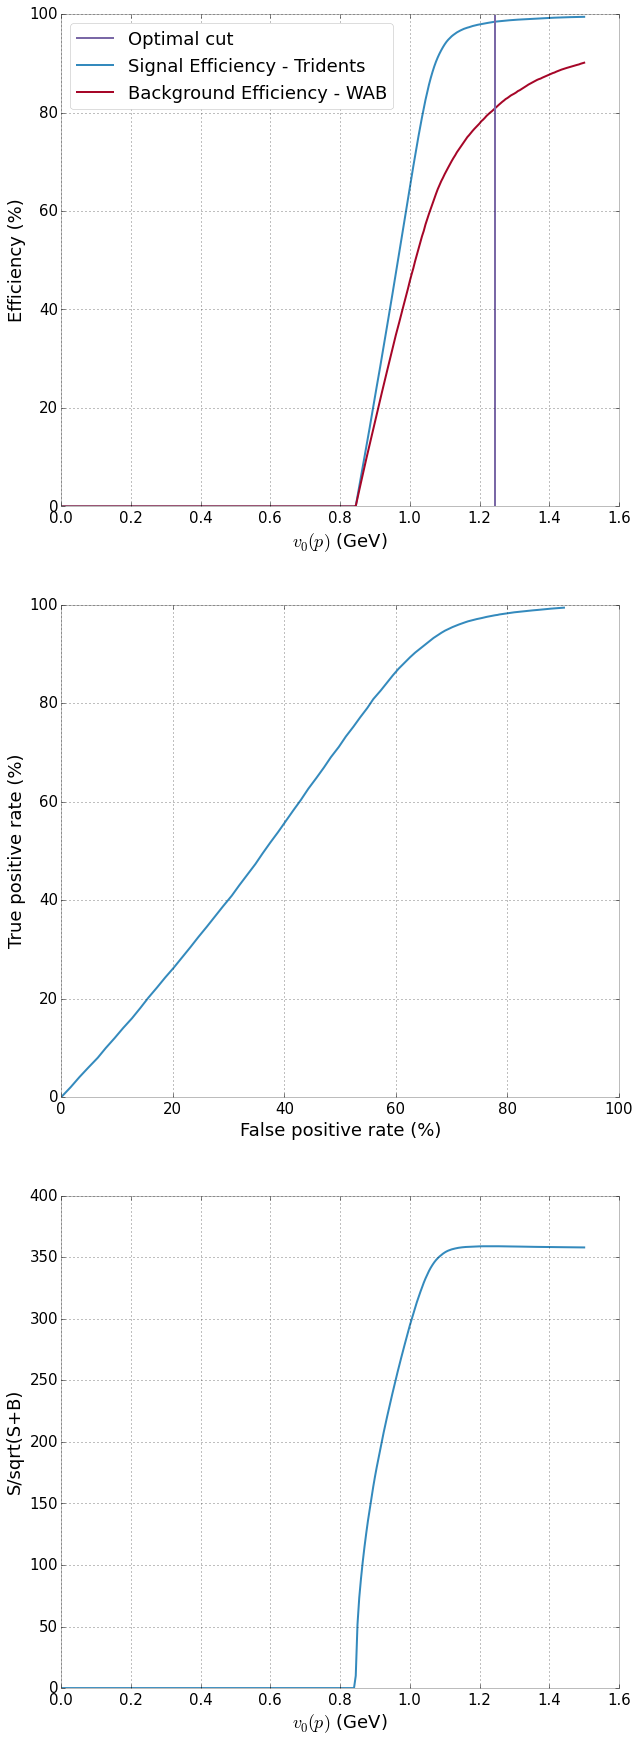

In [28]:
cuts, sig_eff, bkg_eff, sig_sqrt_sig_bkg  = calc_sig_eff(
    v0_p[sig_cut], 
    v0_p[bkg_cut], 0, 1.5, .005, False)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

ax0.errorbar(cuts, sig_eff, marker='None', linestyle='-', label='Signal Efficiency - Tridents')
ax0.errorbar(cuts, bkg_eff, marker='None', linestyle='-', label='Background Efficiency - WAB')
ax0.plot([1.245, 1.245], [0, 100], linestyle='-', label='Optimal cut')
ax0.set_ylabel("Efficiency (%)")
ax0.set_xlabel("$v_{0}(p)$ (GeV)")
ax0.legend(loc=2)

ax1.errorbar(bkg_eff, sig_eff, marker='None', linestyle='-')
ax1.set_xlabel("False positive rate (%)")
ax1.set_ylabel("True positive rate (%)")

ax2.errorbar(cuts, sig_sqrt_sig_bkg, marker='None', linestyle='-')
ax2.set_ylabel("S/sqrt(S+B)")
ax2.set_xlabel("$v_{0}(p)$ (GeV)")

print "Area under ROC curve: %s" % np.trapz(sig_eff, bkg_eff)

### Vertex chi2

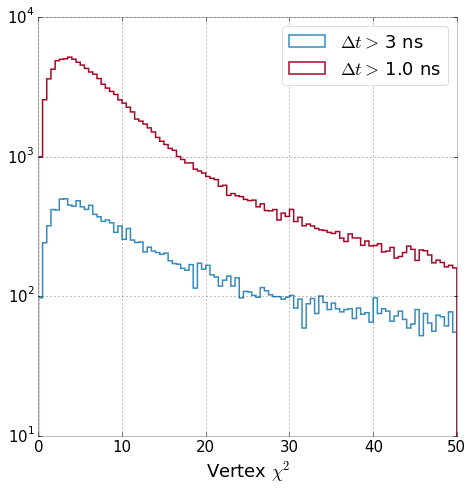

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))   
            
bins = np.linspace(0, 50, 101)
ax.hist(v_chi2[bkg_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 3 ns")
ax.hist(v_chi2[sig_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 1.0 ns")
ax.set_yscale("symlog")
ax.set_xlabel("Vertex $\chi^2$")
ax.legend();

Signal optimized at: 500.0
Signal efficiency at optimal: 99.1595821886
Background efficiency at optimal: 97.784584275
Area under ROC curve: 6730.85980916


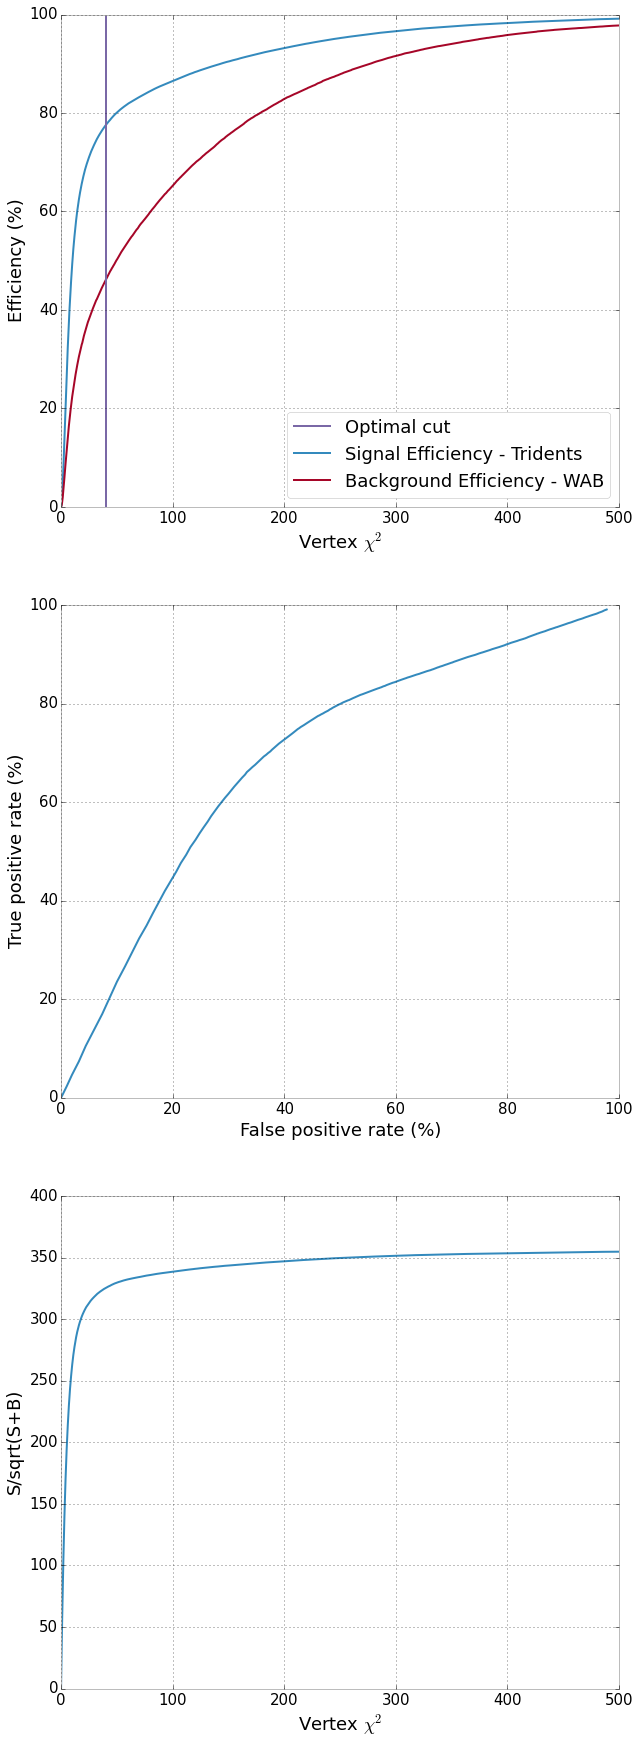

In [30]:
cuts, sig_eff, bkg_eff, sig_sqrt_sig_bkg  = calc_sig_eff(
    v_chi2[sig_cut], 
    v_chi2[bkg_cut], 0, 500, .5, False)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

ax0.errorbar(cuts, sig_eff, marker='None', linestyle='-', label='Signal Efficiency - Tridents')
ax0.errorbar(cuts, bkg_eff, marker='None', linestyle='-', label='Background Efficiency - WAB')
ax0.plot([40, 40], [0, 100], linestyle='-', label='Optimal cut')
ax0.set_ylabel("Efficiency (%)")
ax0.set_xlabel("Vertex $\chi^2$")
ax0.legend(loc=4)

ax1.errorbar(bkg_eff, sig_eff, marker='None', linestyle='-')
ax1.set_xlabel("False positive rate (%)")
ax1.set_ylabel("True positive rate (%)")

ax2.errorbar(cuts, sig_sqrt_sig_bkg, marker='None', linestyle='-')
ax2.set_ylabel("S/sqrt(S+B)")
ax2.set_xlabel("Vertex $\chi^2$")

print "Area under ROC curve: %s" % np.trapz(sig_eff, bkg_eff)

# Cuts: Radiative, FEE, Cluster-Track dt

In [31]:
radiative_cut = v0_p > 0.8*1.056
fee_cut = electron_p < 0.75*1.056

track_cluster_dt_top = top_track_cluster_dt
track_cluster_dt_top = track_cluster_dt_top - 43.0
track_cluster_dt_top = np.absolute(track_cluster_dt_top)

track_cluster_dt_bot = bot_track_cluster_dt
track_cluster_dt_bot = track_cluster_dt_bot - 43.0
track_cluster_dt_bot = np.absolute(track_cluster_dt_bot)

track_cluster_dt_cut = (track_cluster_dt_top < 4.5) & (track_cluster_dt_bot < 4.5)

bkg_cut = (np.abs(cluster_time_diff) > 3) & radiative_cut & fee_cut & track_cluster_dt_cut
sig_cut = (np.abs(cluster_time_diff) < 1) & radiative_cut & fee_cut & track_cluster_dt_cut

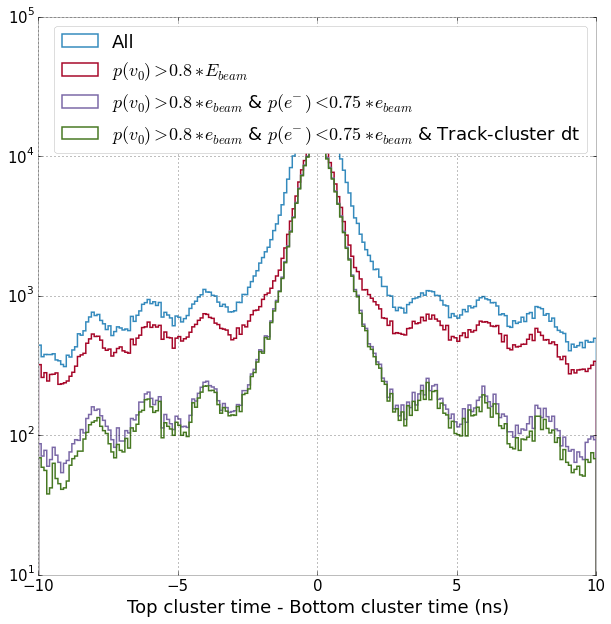

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10.0, 10.0))   

bins = np.linspace(-10, 10, 201)
ax.hist(cluster_time_diff, bins, histtype="step", lw=1.5, label="All")
ax.hist(cluster_time_diff[radiative_cut], bins, histtype="step", lw=1.5, label="$p(v_{0}) > 0.8*E_{beam}$")
ax.hist(cluster_time_diff[radiative_cut & fee_cut], bins, histtype="step", lw=1.5, 
        label="$p(v_{0}) > 0.8*e_{beam}$ & $p(e^{-}) < 0.75*e_{beam}$")
ax.hist(cluster_time_diff[radiative_cut & fee_cut & track_cluster_dt_cut], bins, histtype="step", lw=1.5, 
        label="$p(v_{0}) > 0.8*e_{beam}$ & $p(e^{-}) < 0.75*e_{beam}$ & Track-cluster dt")
ax.set_xlabel("Top cluster time - Bottom cluster time (ns)")
ax.set_yscale("symlog")
ax.legend();

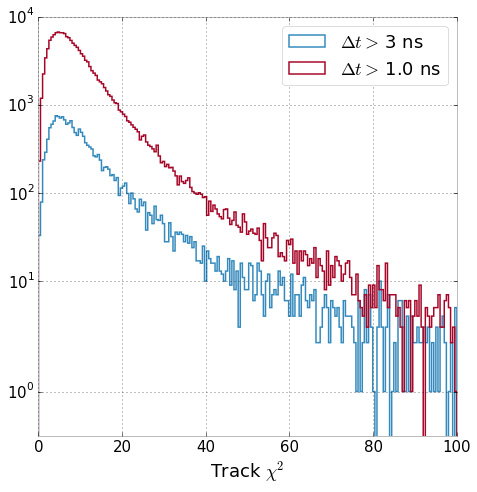

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))   

chi2 = np.append(electron_chi2, positron_chi2)

bins = np.linspace(0, 100, 200)
ax.hist(chi2[bkg_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 3 ns")
ax.hist(chi2[sig_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 1.0 ns")
ax.set_yscale("symlog")
ax.set_xlabel("Track $\chi^2$")
ax.legend()

Signal optimized at: 99.45
Signal efficiency at optimal: 99.6847497701
Background efficiency at optimal: 97.934623516
Area under ROC curve: 5348.70156308


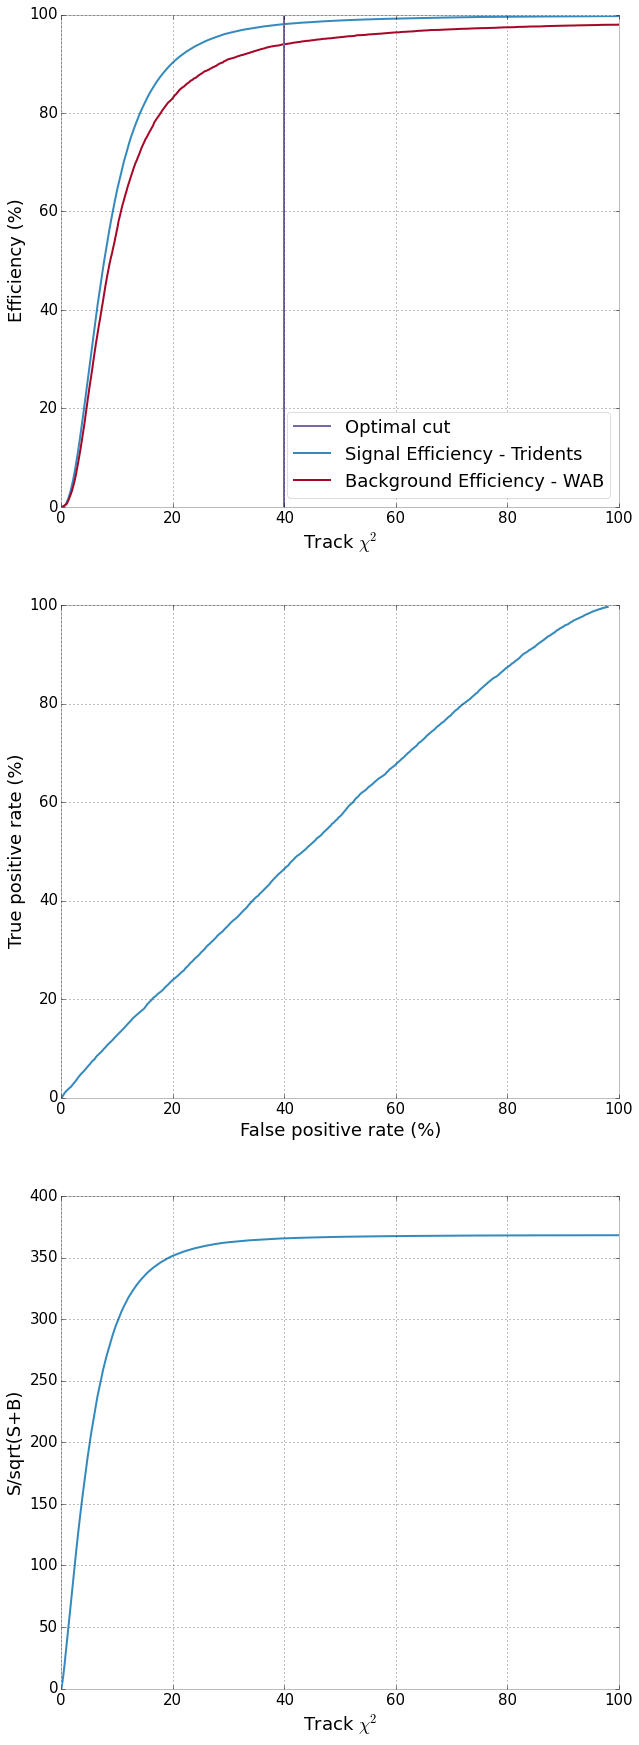

In [34]:
cuts, sig_eff, bkg_eff, sig_sqrt_sig_bkg  = calc_sig_eff(
    chi2[sig_cut], 
    chi2[bkg_cut], 0, 100, .05, False)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

ax0.errorbar(cuts, sig_eff, marker='None', linestyle='-', label='Signal Efficiency - Tridents')
ax0.errorbar(cuts, bkg_eff, marker='None', linestyle='-', label='Background Efficiency - WAB')
ax0.plot([40, 40], [0, 100], linestyle='-', label='Optimal cut')
ax0.set_ylabel("Efficiency (%)")
ax0.set_xlabel("Track $\chi^2$")
ax0.legend(loc=4)

ax1.errorbar(bkg_eff, sig_eff, marker='None', linestyle='-')
ax1.set_xlabel("False positive rate (%)")
ax1.set_ylabel("True positive rate (%)")

ax2.errorbar(cuts, sig_sqrt_sig_bkg, marker='None', linestyle='-')
ax2.set_ylabel("S/sqrt(S+B)")
ax2.set_xlabel("Track $\chi^2$")

print "Area under ROC curve: %s" % np.trapz(sig_eff, bkg_eff)

### p(v0)

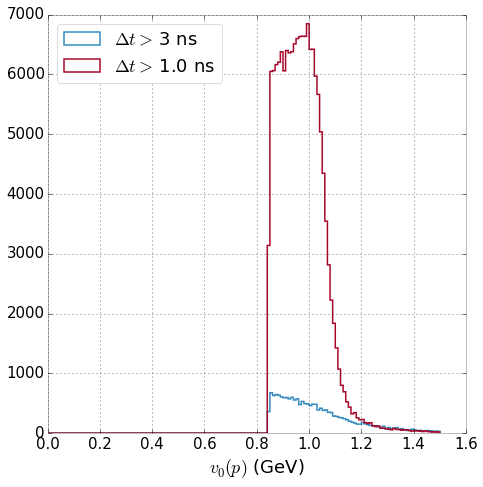

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))   
            
bins = np.linspace(0, 1.5, 151)
ax.hist(v0_p[bkg_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 3 ns")
ax.hist(v0_p[sig_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 1.0 ns")
ax.set_xlabel("$v_{0}(p)$ (GeV)")
ax.legend(loc=2)

Signal optimized at: 1.305
Signal efficiency at optimal: 99.0286352292
Background efficiency at optimal: 88.6377188703
Area under ROC curve: 5555.37356175


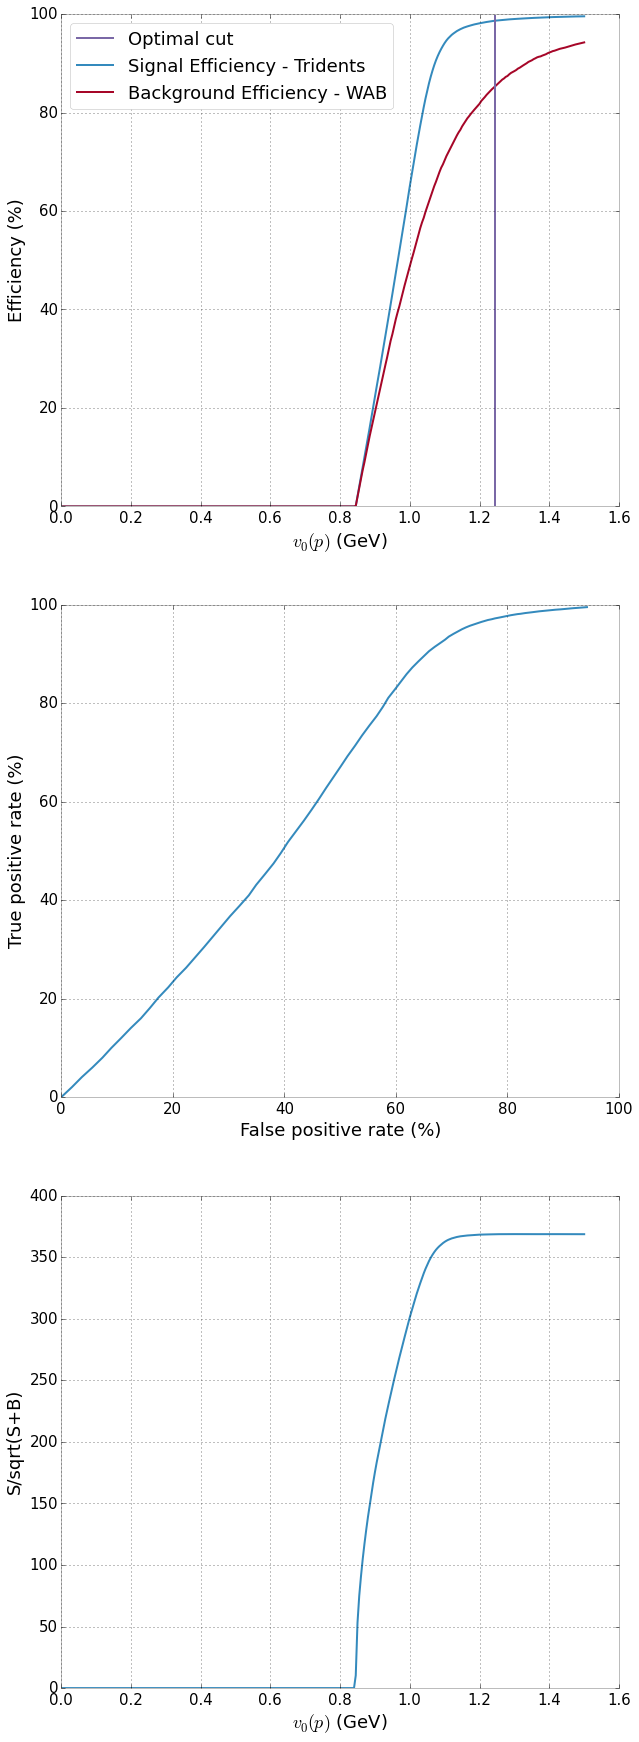

In [36]:
cuts, sig_eff, bkg_eff, sig_sqrt_sig_bkg  = calc_sig_eff(
    v0_p[sig_cut], 
    v0_p[bkg_cut], 0, 1.5, .005, False)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

ax0.errorbar(cuts, sig_eff, marker='None', linestyle='-', label='Signal Efficiency - Tridents')
ax0.errorbar(cuts, bkg_eff, marker='None', linestyle='-', label='Background Efficiency - WAB')
ax0.plot([1.245, 1.245], [0, 100], linestyle='-', label='Optimal cut')
ax0.set_ylabel("Efficiency (%)")
ax0.set_xlabel("$v_{0}(p)$ (GeV)")
ax0.legend(loc=2)

ax1.errorbar(bkg_eff, sig_eff, marker='None', linestyle='-')
ax1.set_xlabel("False positive rate (%)")
ax1.set_ylabel("True positive rate (%)")

ax2.errorbar(cuts, sig_sqrt_sig_bkg, marker='None', linestyle='-')
ax2.set_ylabel("S/sqrt(S+B)")
ax2.set_xlabel("$v_{0}(p)$ (GeV)")

print "Area under ROC curve: %s" % np.trapz(sig_eff, bkg_eff)

### Vertex Chi2

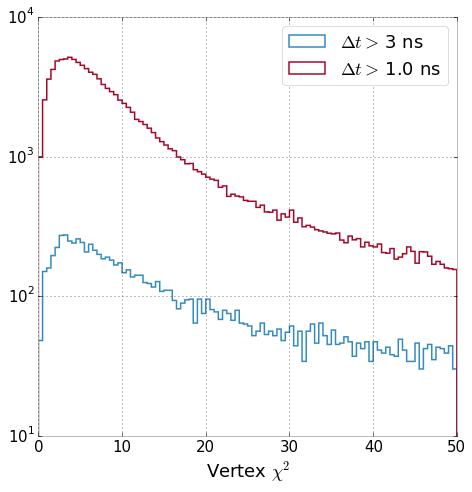

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))   
            
bins = np.linspace(0, 50, 101)
ax.hist(v_chi2[bkg_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 3 ns")
ax.hist(v_chi2[sig_cut], bins, histtype="step", lw=1.5, label="$\Delta t >$ 1.0 ns")
ax.set_yscale("symlog")
ax.set_xlabel("Vertex $\chi^2$")
ax.legend();

Signal optimized at: 500.0
Signal efficiency at optimal: 99.1790358597
Background efficiency at optimal: 98.1785656204
Area under ROC curve: 6800.09454203


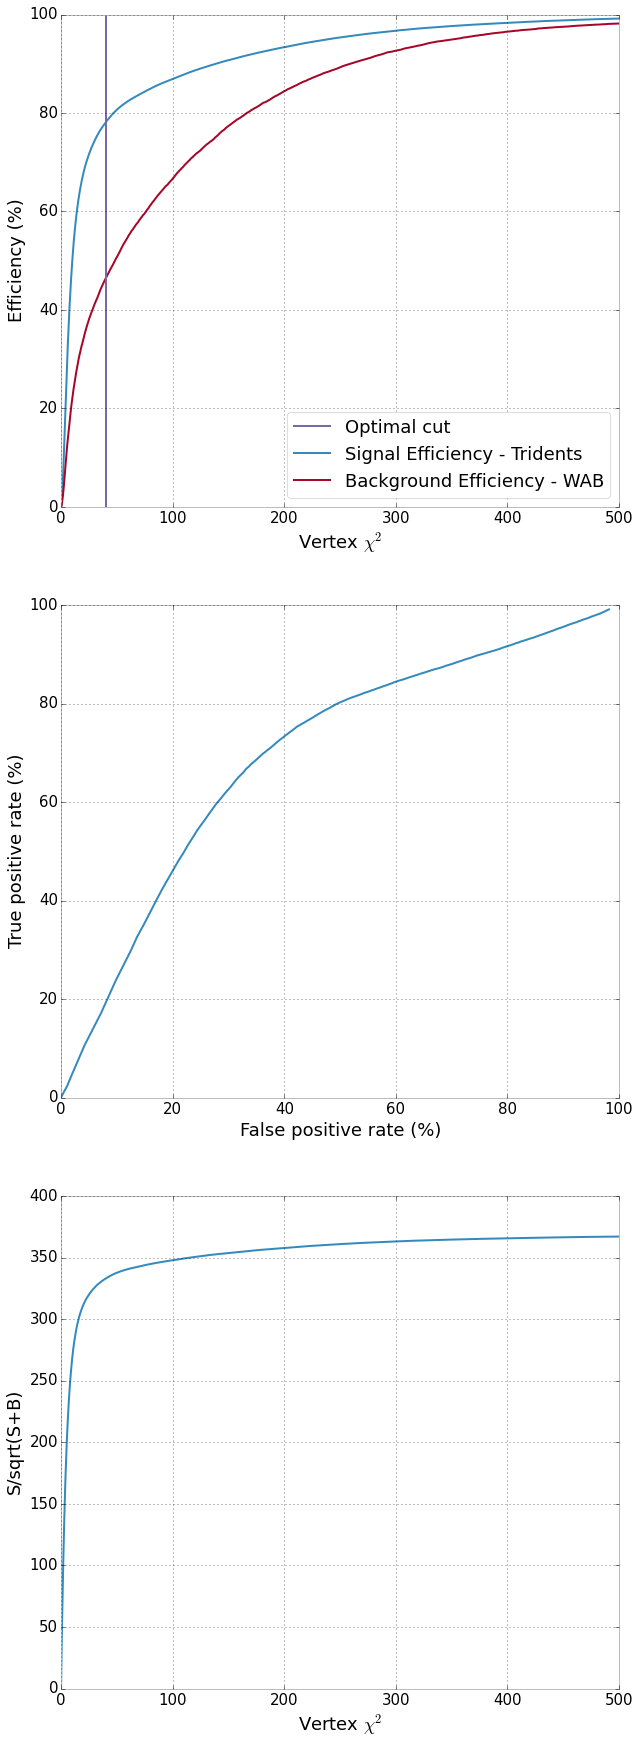

In [38]:
cuts, sig_eff, bkg_eff, sig_sqrt_sig_bkg  = calc_sig_eff(
    v_chi2[sig_cut], 
    v_chi2[bkg_cut], 0, 500, .5, False)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

ax0.errorbar(cuts, sig_eff, marker='None', linestyle='-', label='Signal Efficiency - Tridents')
ax0.errorbar(cuts, bkg_eff, marker='None', linestyle='-', label='Background Efficiency - WAB')
ax0.plot([40, 40], [0, 100], linestyle='-', label='Optimal cut')
ax0.set_ylabel("Efficiency (%)")
ax0.set_xlabel("Vertex $\chi^2$")
ax0.legend(loc=4)

ax1.errorbar(bkg_eff, sig_eff, marker='None', linestyle='-')
ax1.set_xlabel("False positive rate (%)")
ax1.set_ylabel("True positive rate (%)")

ax2.errorbar(cuts, sig_sqrt_sig_bkg, marker='None', linestyle='-')
ax2.set_ylabel("S/sqrt(S+B)")
ax2.set_xlabel("Vertex $\chi^2$")

print "Area under ROC curve: %s" % np.trapz(sig_eff, bkg_eff)

# Cuts: Radiative, FEE, Cluster-track dt, p(v0)

In [39]:
radiative_cut = v0_p > 0.8*1.056
fee_cut = electron_p < 0.75*1.056
v0_p_cut = v0_p < 1.2*1.056
chi2_cut = (electron_chi2 < 40) & (positron_chi2 < 40)

track_cluster_dt_top = top_track_cluster_dt
track_cluster_dt_top = track_cluster_dt_top - 43.0
track_cluster_dt_top = np.absolute(track_cluster_dt_top)

track_cluster_dt_bot = bot_track_cluster_dt
track_cluster_dt_bot = track_cluster_dt_bot - 43.0
track_cluster_dt_bot = np.absolute(track_cluster_dt_bot)

track_cluster_dt_cut = (track_cluster_dt_top < 4.5) & (track_cluster_dt_bot < 4.5)

bkg_cut = (np.abs(cluster_time_diff) > 3) & radiative_cut & fee_cut & track_cluster_dt_cut & v0_p_cut
sig_cut = (np.abs(cluster_time_diff) < 1) & radiative_cut & fee_cut & track_cluster_dt_cut & v0_p_cut

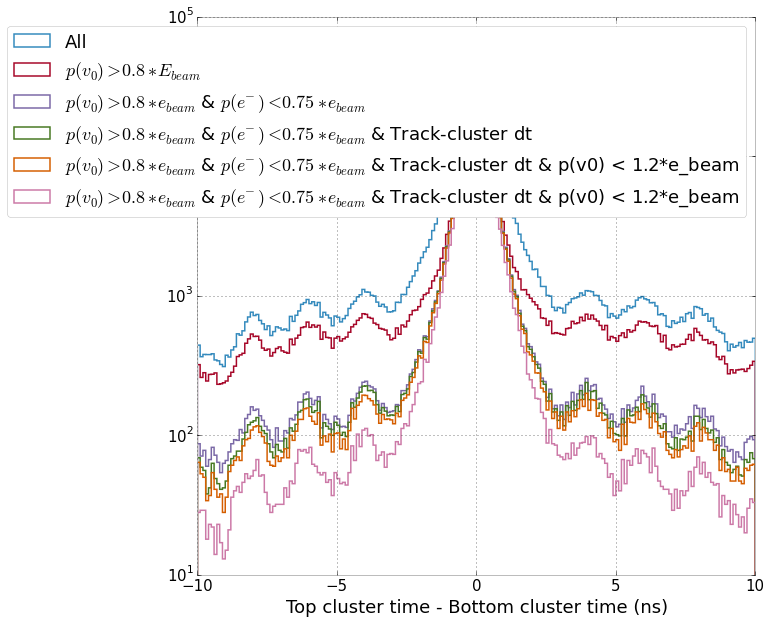

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10.0, 10.0))   

bins = np.linspace(-10, 10, 201)
ax.hist(cluster_time_diff, bins, histtype="step", lw=1.5, label="All")
ax.hist(cluster_time_diff[radiative_cut], bins, histtype="step", lw=1.5, label="$p(v_{0}) > 0.8*E_{beam}$")
ax.hist(cluster_time_diff[radiative_cut & fee_cut], bins, histtype="step", lw=1.5, 
        label="$p(v_{0}) > 0.8*e_{beam}$ & $p(e^{-}) < 0.75*e_{beam}$")
ax.hist(cluster_time_diff[radiative_cut & fee_cut & track_cluster_dt_cut], bins, histtype="step", lw=1.5, 
        label="$p(v_{0}) > 0.8*e_{beam}$ & $p(e^{-}) < 0.75*e_{beam}$ & Track-cluster dt")
ax.hist(cluster_time_diff[radiative_cut & fee_cut & track_cluster_dt_cut & v0_p_cut], bins, histtype="step", lw=1.5, 
        label="$p(v_{0}) > 0.8*e_{beam}$ & $p(e^{-}) < 0.75*e_{beam}$ & Track-cluster dt & p(v0) < 1.2*e_beam")
ax.hist(cluster_time_diff[radiative_cut & fee_cut & track_cluster_dt_cut & v0_p_cut & chi2_cut], bins, histtype="step", lw=1.5, 
        label="$p(v_{0}) > 0.8*e_{beam}$ & $p(e^{-}) < 0.75*e_{beam}$ & Track-cluster dt & p(v0) < 1.2*e_beam")
ax.set_xlabel("Top cluster time - Bottom cluster time (ns)")
ax.set_yscale("symlog")
ax.legend();